# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['zhaotong',
 'avarua',
 'kapaa',
 'tucuma',
 'punta arenas',
 'portland',
 'bredasdorp',
 'amderma',
 'dikson',
 'ushuaia',
 'minnedosa',
 'college',
 'busselton',
 'kavaratti',
 'mataura',
 'arkhangelos',
 'ust-barguzin',
 'bluff',
 'ribeira grande',
 'samusu',
 'rincon',
 'illoqqortoormiut',
 'hasaki',
 'mazatlan',
 'tiksi',
 'rikitea',
 'nikolskoye',
 'saskylakh',
 'atuona',
 'butaritari',
 'bethel',
 'shahr-e kord',
 'qaanaaq',
 'ixtapa',
 'weligama',
 'cabo san lucas',
 'uthal',
 'hermanus',
 'lorengau',
 'trinidad',
 'vaini',
 'bargal',
 'sao jose da coroa grande',
 'cape town',
 'carnarvon',
 'orange cove',
 'hilo',
 'bonavista',
 'taolanaro',
 'dzhusaly',
 'georgetown',
 'port alfred',
 'santa cruz del sur',
 'mirnyy',
 'airai',
 'vestmannaeyjar',
 'ostrovnoy',
 'nizhniy kuranakh',
 'sakakah',
 'tasbuget',
 'tavrichanka',
 'torbay',
 'ambilobe',
 'lubango',
 'sentyabrskiy',
 'alta floresta',
 'zimmi',
 'botwood',
 'marzuq',
 'thompson',
 'kattivakkam',
 'katobu',
 'hithadhoo',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#Building URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=72d280ce04d25900cd45476734effbdb&units=imperial&q='

In [4]:
# Set up lists to hold reponse info
names = []
temp = []
resp_obj=[]
lat=[]
long=[]
cloudiness=[]
windspeed=[]
humidity=[]
country=[]
date=[]
cnt = 0
for i,city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        resp_obj.append(response)
        names.append(response['name'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing record {i+1} of {len(cities)} for the city: {city}')
        time.sleep(1)
    except:
        print(f'City not found.')  

Processing record 1 of 653 for the city: zhaotong
Processing record 2 of 653 for the city: avarua
Processing record 3 of 653 for the city: kapaa
Processing record 4 of 653 for the city: tucuma
Processing record 5 of 653 for the city: punta arenas
Processing record 6 of 653 for the city: portland
Processing record 7 of 653 for the city: bredasdorp
City not found.
Processing record 9 of 653 for the city: dikson
Processing record 10 of 653 for the city: ushuaia
Processing record 11 of 653 for the city: minnedosa
Processing record 12 of 653 for the city: college
Processing record 13 of 653 for the city: busselton
Processing record 14 of 653 for the city: kavaratti
Processing record 15 of 653 for the city: mataura
City not found.
Processing record 17 of 653 for the city: ust-barguzin
Processing record 18 of 653 for the city: bluff
Processing record 19 of 653 for the city: ribeira grande
City not found.
Processing record 21 of 653 for the city: rincon
City not found.
Processing record 23 of 

Processing record 169 of 653 for the city: saint anthony
Processing record 170 of 653 for the city: comodoro rivadavia
Processing record 171 of 653 for the city: sitka
Processing record 172 of 653 for the city: kirakira
Processing record 173 of 653 for the city: moba
Processing record 174 of 653 for the city: mount pleasant
Processing record 175 of 653 for the city: barrow
Processing record 176 of 653 for the city: kodiak
Processing record 177 of 653 for the city: geraldton
Processing record 178 of 653 for the city: souillac
Processing record 179 of 653 for the city: jasa tomic
Processing record 180 of 653 for the city: baruun-urt
Processing record 181 of 653 for the city: soligalich
Processing record 182 of 653 for the city: tupik
Processing record 183 of 653 for the city: xichang
Processing record 184 of 653 for the city: jacareacanga
Processing record 185 of 653 for the city: jamestown
City not found.
Processing record 187 of 653 for the city: auki
Processing record 188 of 653 for t

Processing record 334 of 653 for the city: panama city
Processing record 335 of 653 for the city: roald
City not found.
Processing record 337 of 653 for the city: inirida
Processing record 338 of 653 for the city: garden city
Processing record 339 of 653 for the city: acajutla
Processing record 340 of 653 for the city: cockburn town
Processing record 341 of 653 for the city: tocopilla
Processing record 342 of 653 for the city: palu
Processing record 343 of 653 for the city: zhoucheng
Processing record 344 of 653 for the city: obihiro
City not found.
Processing record 346 of 653 for the city: codrington
Processing record 347 of 653 for the city: clearwater
Processing record 348 of 653 for the city: ukiah
City not found.
Processing record 350 of 653 for the city: merauke
Processing record 351 of 653 for the city: pelotas
Processing record 352 of 653 for the city: kondinskoye
City not found.
Processing record 354 of 653 for the city: aktau
Processing record 355 of 653 for the city: okha
P

Processing record 500 of 653 for the city: thanh hoa
Processing record 501 of 653 for the city: kahului
Processing record 502 of 653 for the city: harlingen
Processing record 503 of 653 for the city: naliya
Processing record 504 of 653 for the city: veliko gradiste
Processing record 505 of 653 for the city: mineral wells
Processing record 506 of 653 for the city: havre-saint-pierre
Processing record 507 of 653 for the city: christchurch
Processing record 508 of 653 for the city: kaihua
Processing record 509 of 653 for the city: alugan
Processing record 510 of 653 for the city: high river
Processing record 511 of 653 for the city: abu dhabi
Processing record 512 of 653 for the city: mercedes
City not found.
City not found.
Processing record 515 of 653 for the city: san rafael
Processing record 516 of 653 for the city: vigrestad
Processing record 517 of 653 for the city: hay river
Processing record 518 of 653 for the city: karratha
Processing record 519 of 653 for the city: te anau
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_dict = {
    "City": names,
    "Lat":lat,
    "Lng":long,
    "Max Temp":temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":windspeed,
    "Country":country,
    "Date":date
}
cities_data = pd.DataFrame(cities_dict)
cities_data.to_csv('../output_data/cities.csv')
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhaotong,27.3167,103.7167,42.80,62,79,2.08,CN,1643873712
1,Avarua,-21.2078,-159.7750,78.85,89,20,12.66,CK,1643873714
2,Kapaa,22.0752,-159.3190,75.18,72,100,4.61,US,1643873716
3,Tucumã,-0.1833,-50.0500,75.04,93,100,6.44,BR,1643873646
4,Punta Arenas,-53.1500,-70.9167,42.91,65,75,5.75,CL,1643873719
...,...,...,...,...,...,...,...,...,...
599,Constantine,36.3650,6.6147,38.61,75,0,3.44,DZ,1643874687
600,Petra,30.3222,35.4793,51.71,55,0,17.65,JO,1643874688
601,Fort Nelson,58.8053,-122.7002,-9.81,70,100,9.22,CA,1643874690
602,Araouane,18.9048,-3.5265,58.82,22,34,11.86,ML,1643874692


In [6]:
# file_to_load = "../output_data/cities.csv"
# # Read Purchasing File and store into Pandas data frame
# cities_data_1 = pd.read_csv(file_to_load)
# cities_data_1.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Zhaotong,27.3167,103.7167,42.80,62,79,2.08,CN,1643873712
1,1,Avarua,-21.2078,-159.7750,78.85,89,20,12.66,CK,1643873714
2,2,Kapaa,22.0752,-159.3190,75.18,72,100,4.61,US,1643873716
3,3,Tucumã,-0.1833,-50.0500,75.04,93,100,6.44,BR,1643873646
4,4,Punta Arenas,-53.1500,-70.9167,42.91,65,75,5.75,CL,1643873719


In [7]:
print(f"The total No. of unique Cities is: {len(pd.unique(cities_data['City']))}.")

The toatl No. of unique Cities is: 604.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#check if there are any cities with >100% humidity
high_humidity = cities_data[(cities_data_1['Humidity'] > 100)]
high_humidity

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
clean_cities_data = cities_data.drop(cities_data_1[cities_data_1["Humidity"]>100].index)
clean_cities_data.reset_index(inplace=True)
print(f"The clean No. of unique Cities is: {len(pd.unique(clean_cities_data['City']))}.")

The clean No. of unique Cities is: 604.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Date record

In [10]:
endRunDate = clean_cities_data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

## Latitude vs. Humidity Plot

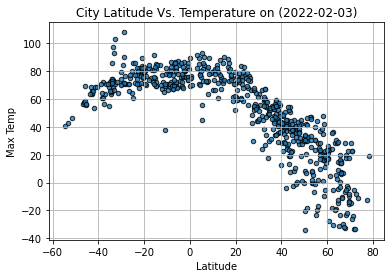

In [11]:
title = "City Latitude Vs. Temperature"
Fig_1 = clean_cities_data.plot(kind="scatter", x="Lat", y="Max Temp", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_1.get_figure().savefig(f"../output_data/{title}.png")

## Latitude vs. Cloudiness Plot

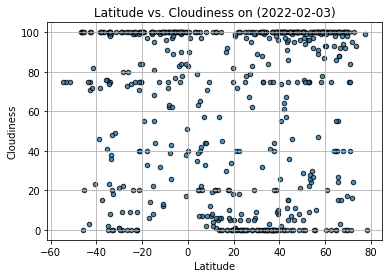

In [12]:
title = "Latitude vs. Cloudiness"
Fig_2 = clean_cities_data.plot(kind="scatter", x="Lat", y="Cloudiness", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_2.get_figure().savefig(f"../output_data/{title}.png")

## Latitude vs. Wind Speed Plot

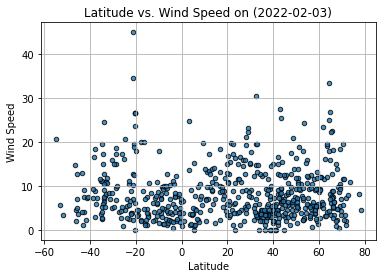

In [13]:
title = "Latitude vs. Wind Speed"
Fig_3 = clean_cities_data.plot(kind="scatter", x="Lat", y="Wind Speed", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_3.get_figure().savefig(f"../output_data/{title}.png")

## Linear Regression

In [14]:
def plot_linear_regression(x_values,y_values,y_label,text_coordinates):
    
    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #print out
    print(f" Slope:{slope}\n",
      f"Intercept:{intercept}\n",
      f"The r-squared is:{rvalue}\n",
      '--------------------------\n',
      f'{line_eq}') 
    # Plot
    plt.scatter(x_values,y_values, edgecolor="black",linewidth=1,marker="o",alpha=0.8)
    plt.plot(x_values, regress_values, "r-") 
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()
    plt.savefig(f"../output_data/{title}.png")
    plt.show()

In [15]:
L=0
north_hemi = clean_cities_data.query(f"Lat >= {L}")
south_hemi = clean_cities_data.query(f"Lat <= {L}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 Slope:-1.3585421982450159
 Intercept:93.5413842597955
 The r-squared is:-0.8660488276278927
 --------------------------
 y = -1.36 x + 93.54


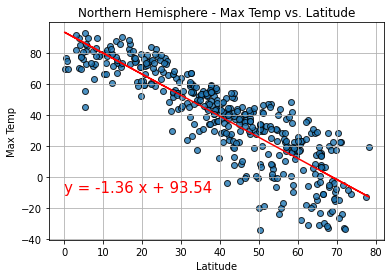

In [16]:
title = "Northern Hemisphere - Max Temp vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Max Temp"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Max Temp', (0,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 Slope:0.3237461991536086
 Intercept:80.71703402531084
 The r-squared is:0.45260111941765807
 --------------------------
 y = 0.32 x + 80.72


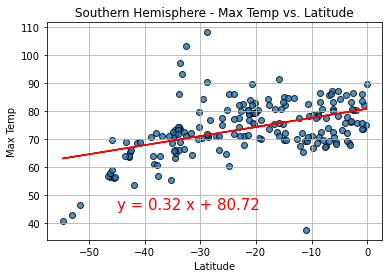

In [17]:
title ="Southern Hemisphere - Max Temp vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Max Temp"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Max Temp', (-45,45))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Slope:0.5234892069808902
 Intercept:51.68101301643878
 The r-squared is:0.42563177106198735
 --------------------------
 y = 0.52 x + 51.68


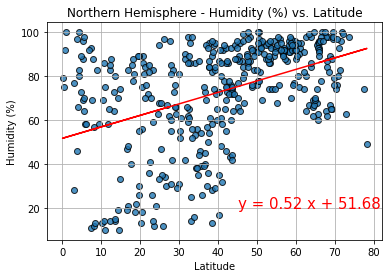

In [18]:
title="Northern Hemisphere - Humidity (%) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Humidity"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Humidity (%)', (45,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Slope:0.21966882998353424
 Intercept:82.08343202730889
 The r-squared is:0.1740034784912294
 --------------------------
 y = 0.22 x + 82.08


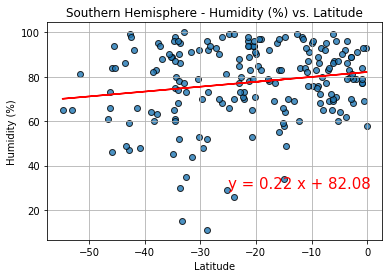

In [19]:
title="Southern Hemisphere - Humidity (%) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Humidity"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Humidity (%)', (-25,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Slope:0.6565376868421321
 Intercept:33.79073611874451
 The r-squared is:0.29634774927705543
 --------------------------
 y = 0.66 x + 33.79


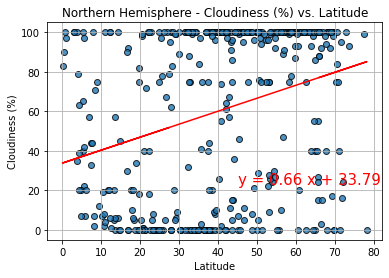

In [20]:
title="Northern Hemisphere - Cloudiness (%) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Cloudiness (%)', (45,23))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Slope:0.5530585489176095
 Intercept:83.16056953168466
 The r-squared is:0.2139325785129357
 --------------------------
 y = 0.55 x + 83.16


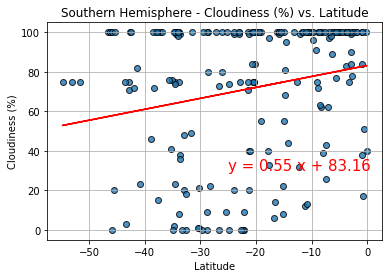

In [21]:
title="Southern Hemisphere - Cloudiness (%) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Cloudiness (%)', (-25,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Slope:0.008947425417196852
 Intercept:7.730345312624905
 The r-squared is:0.02989443609935575
 --------------------------
 y = 0.01 x + 7.73


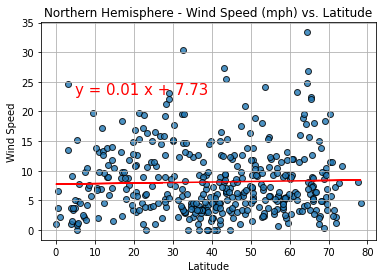

In [22]:
title="Northern Hemisphere - Wind Speed (mph) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Wind Speed"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Wind Speed', (5,23))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Slope:0.5530585489176095
 Intercept:83.16056953168466
 The r-squared is:0.2139325785129357
 --------------------------
 y = 0.55 x + 83.16


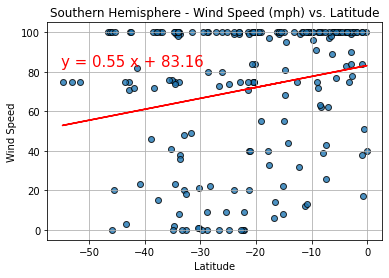

In [23]:
title="Southern Hemisphere - Wind Speed (mph) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Wind Speed', (-55,83))